# __Project Title:__ Customer Churn Prediction using EDA

### __Problem Statement:__ Develop a predictive model using EDA to identify key factors driving customer churn and anticipate which customers are at risk, enabling targeted retention strategies to reduce churn rates and improve customer retention.

### __Approach to Solve the problem:__
__Data Cleaning:__ Removing the unwanted columns, Use imputation techniques for reducing null values/missing values

__Data Visualization:__ Univariate Analysis and Bivariate Analysis(plotting some required visualizations)

In [4]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns

In [5]:
#importing the dataset
df=pd.read_csv('data (1).csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,Company,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,Country,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,BSNL,1,No,No phone service,DSL,...,No,No,India,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,BSNL,34,Yes,No,DSL,...,No,No,India,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,BSNL,2,Yes,No,DSL,...,No,No,India,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,BSNL,45,No,No phone service,DSL,...,Yes,No,India,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,BSNL,2,Yes,No,Fiber optic,...,No,No,India,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,BSNL,8,Yes,Yes,Fiber optic,...,No,Yes,India,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,BSNL,22,Yes,Yes,Fiber optic,...,No,Yes,India,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,BSNL,10,No,No phone service,DSL,...,No,No,India,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,BSNL,28,Yes,Yes,Fiber optic,...,Yes,Yes,India,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,BSNL,62,Yes,No,DSL,...,No,No,India,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
#Descibe the information about numerical columns
df.describe()

,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000
mean,0.162147,64.761692
std,0.368612,30.090047
min,0.000000,18.250000
25%,0.000000,35.500000
50%,0.000000,70.350000
75%,0.000000,89.850000
max,1.000000,118.750000


In [7]:
#display the information about the dataser
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Company           7043 non-null   object 
 6   tenure            7042 non-null   object 
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  Country           7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [8]:
df.shape

(7043, 23)

In [9]:
#Displaying all the columns in the dataset
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Company', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'Country', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


__Dropping Unwanted Columns__

In [11]:
df.drop('Company', axis=1, inplace=True)

In [12]:
df.drop('Country', axis=1, inplace=True)

In [13]:
df.drop('customerID', axis=1, inplace=True)

In [14]:
#Dataset after dropping unwanted columns
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
# Display the number of null values per column
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              1
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [16]:
#Deleting rows with null values
df = df.dropna()
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
# Replace empty strings with NaN in 'TotalCharges' column
df['TotalCharges'].replace('', float('nan'), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_28712\770936229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace('', float('nan'), inplace=True)


### __Distribution of Churn by Contract Type__
To understand how different contract types relate to customer churn.

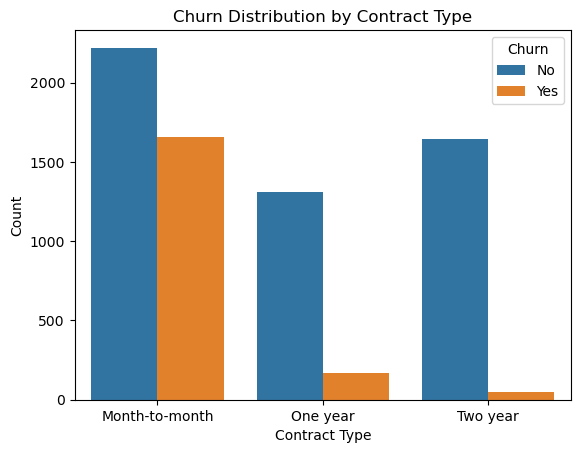

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#Countplot between contract and churn
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

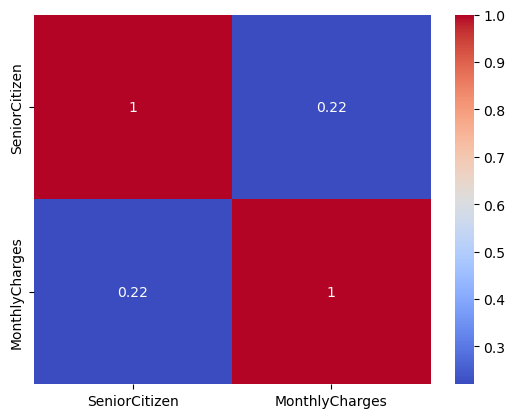

In [20]:
corr_matrix = df.corr(numeric_only=True) 
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm') 
plt.show()

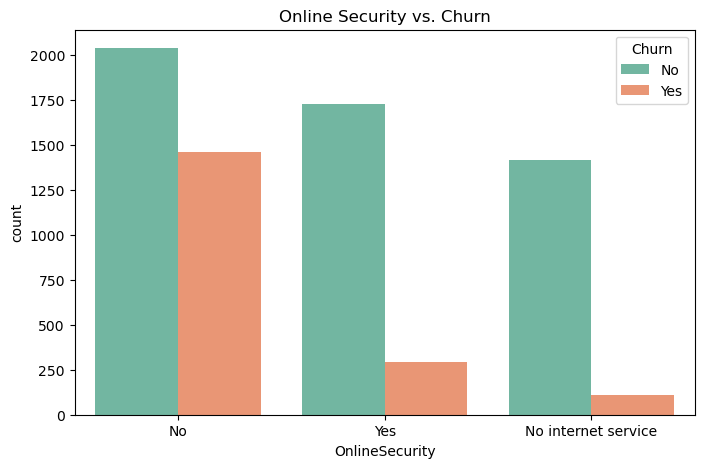

In [21]:
# Plot: Online Security vs. Churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='Set2')
plt.title('Online Security vs. Churn')
plt.show()

### __Average Monthly Charges by Churn Status__
To see if there's a significant difference in average monthly charges between churned and non-churned customers.

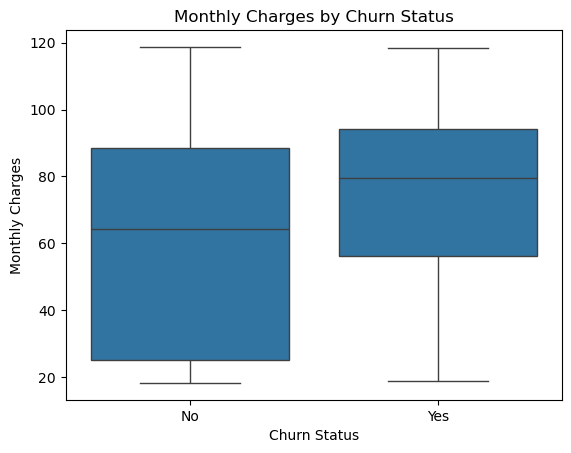

In [23]:
#Boxplot between Churn and monthly charges
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.show()

### __Heat Map__

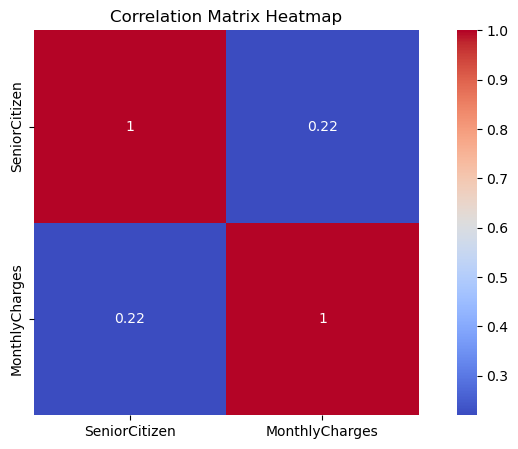

In [25]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### __Multivariate Scatter Plot__
A scatter plot matrix that adds more variables with different colors for each Churn category to show multivariate relationships.

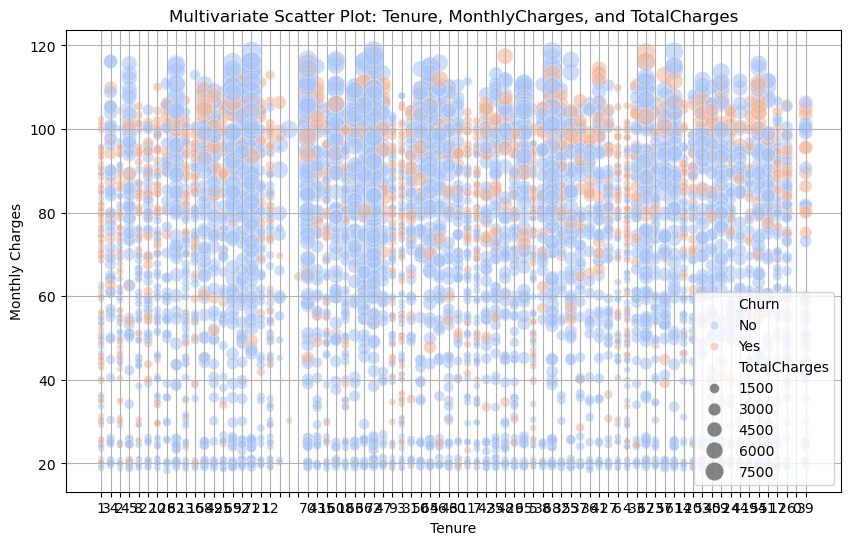

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'TotalCharges' column to numeric, handling errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Multivariate scatter plot
plt.figure(figsize=(10, 6))
max_size = 1000
df['TotalCharges_clipped'] = df['TotalCharges'].clip(upper=max_size)
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', size='TotalCharges', sizes=(20, 200), palette='coolwarm', alpha=0.6)
plt.title('Multivariate Scatter Plot: Tenure, MonthlyCharges, and TotalCharges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()

### __Contract Type vs Payment Method Distribution__
This chart highlights the distribution of payment methods across different contract types, illustrating common payment preferences.

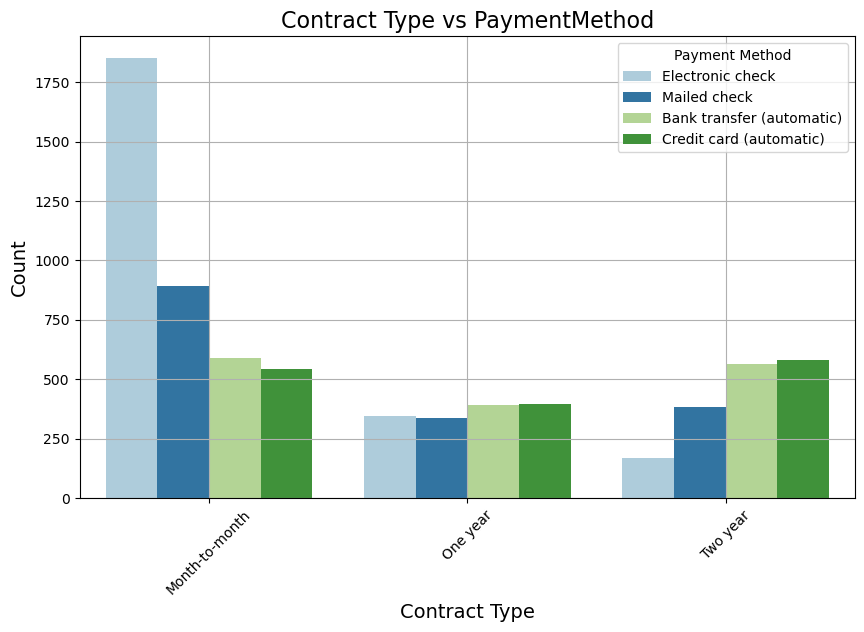

In [29]:
# Count plot: Contract type vs PaymentMethod by Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='PaymentMethod', palette='Paired')
plt.title('Contract Type vs PaymentMethod', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Payment Method', loc='upper right')
plt.show()

### __Scatter Plot of Monthly Charges vs Total Charges by Churn Status__
This graph shows the relationship between monthly and total charges, with churn status visually distinguished.

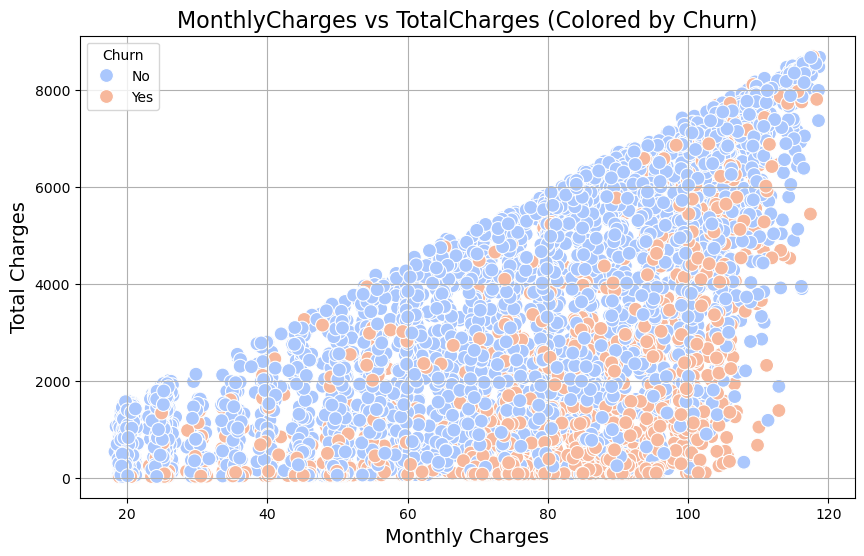

In [31]:
# Scatter plot: MonthlyCharges vs TotalCharges, colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='coolwarm', edgecolor='w', s=100)
plt.title('MonthlyCharges vs TotalCharges (Colored by Churn)', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Total Charges', fontsize=14)
plt.grid(True)
plt.legend(title='Churn', loc='upper left')
plt.show()

### __Histogram of Tenure Distribution by Churn__
The distribution of customer tenure reveals that customers with shorter tenures are more likely to churn.

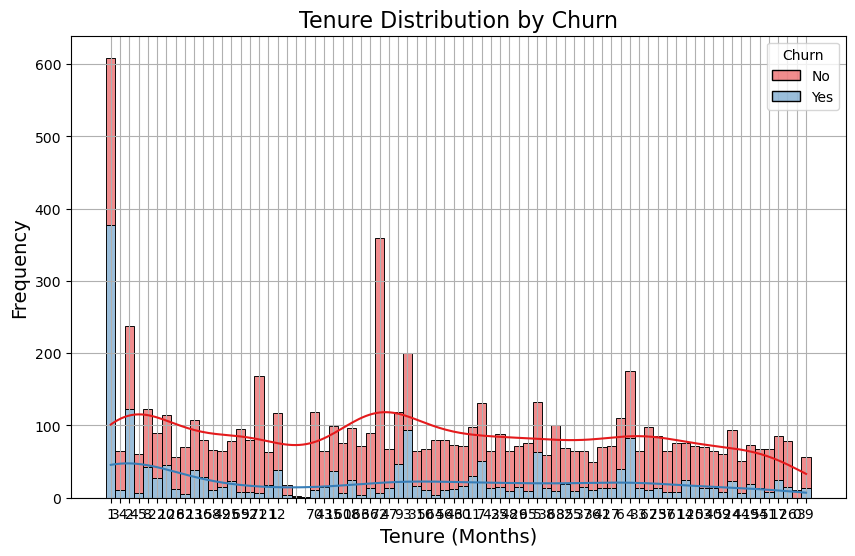

In [33]:
# Histogram: Tenure distribution across Churn categories
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True, palette='Set1')
plt.title('Tenure Distribution by Churn', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

### __Internet Service Usage by Churn__
This graph compares the usage of different internet services with the churn rate, showing higher churn in fiber optic users.

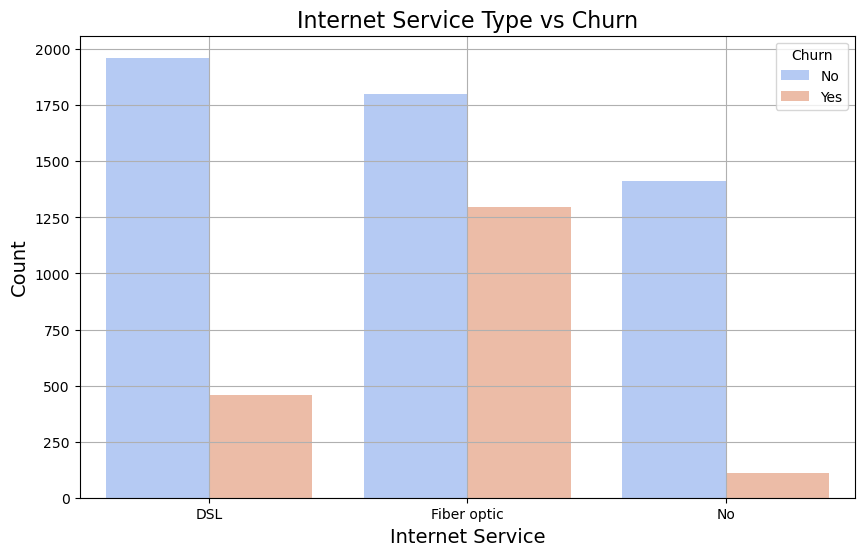

In [35]:
# Count plot: InternetService vs Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='coolwarm')
plt.title('Internet Service Type vs Churn', fontsize=16)
plt.xlabel('Internet Service', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.legend(title='Churn', loc='upper right')
plt.show()

### __Senior Citizens vs Dependents__
A comparison of the distribution of senior citizens and dependents across the customer base, helping to identify key demographic patterns.

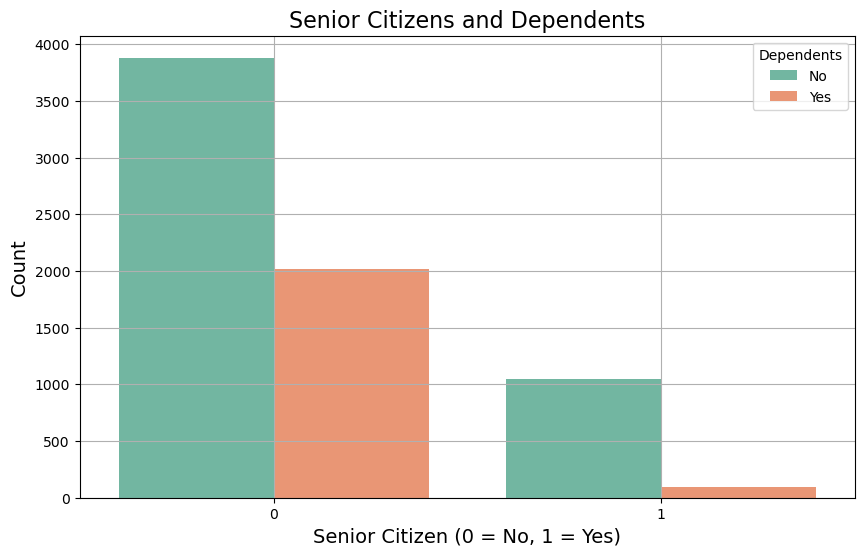

In [37]:
# Stacked count plot: SeniorCitizen vs Dependents
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SeniorCitizen', hue='Dependents', palette='Set2')
plt.title('Senior Citizens and Dependents', fontsize=16)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.legend(title='Dependents', loc='upper right')
plt.show()

### __Pie Chart__

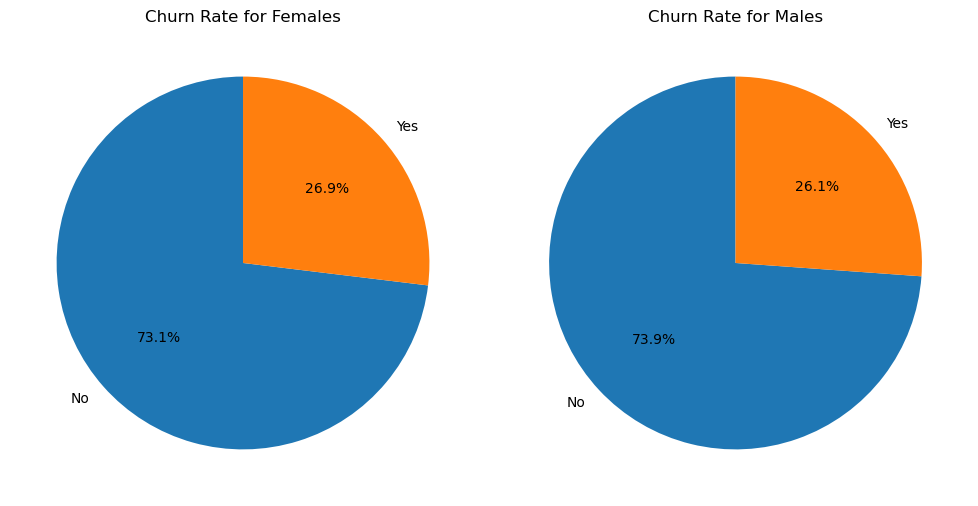

In [39]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has columns 'gender' and 'Churn'
churn_by_gender = df.groupby(['gender', 'Churn'])['Churn'].count().unstack()
# Create the pie charts
plt.figure(figsize=(10, 5))
# Churn Pie Chart for Females
plt.subplot(1, 2, 1)
plt.pie(churn_by_gender.loc['Female', ['No', 'Yes']], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate for Females')
# Churn Pie Chart for Males
plt.subplot(1, 2, 2)
plt.pie(churn_by_gender.loc['Male', ['No', 'Yes']], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate for Males')
plt.tight_layout()
plt.show()

### __Churn Rate by Partner Status__

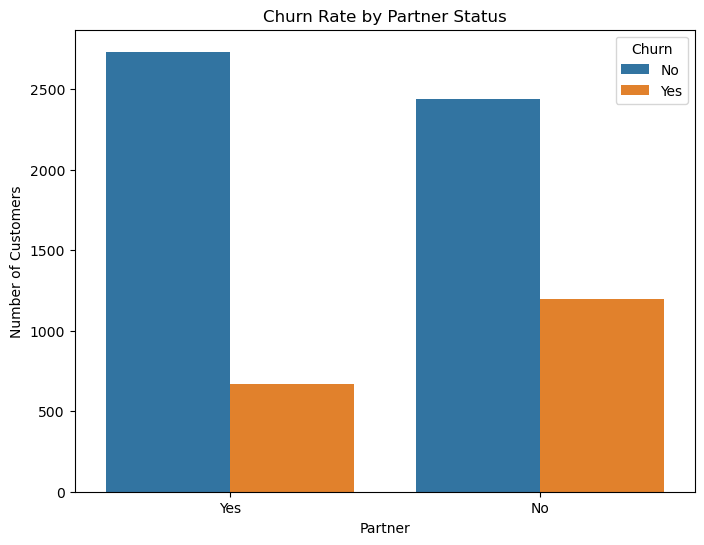

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn Rate by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Number of Customers')
plt.show()

### __Scatter Plot of Tenure vs. Monthly Charges with Churn Differentiation__

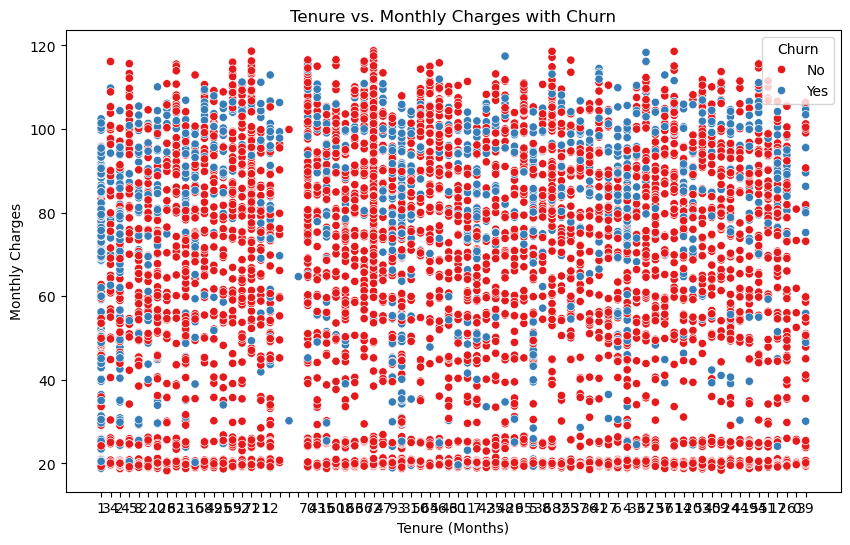

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='Set1')
plt.title('Tenure vs. Monthly Charges with Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

In [74]:
df.isnull().sum()

gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges            11
Churn                    0
TotalCharges_clipped    11
dtype: int64

In [76]:
# -------------------------------------------
# MACHINE LEARNING - CUSTOMER CHURN PREDICTION
# -------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import joblib
import pandas as pd

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

# Encode target separately
target_encoder = LabelEncoder()
df_encoded['Churn'] = target_encoder.fit_transform(df_encoded['Churn'])

# Define features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save model and encoders
joblib.dump(model, 'model.pkl')
joblib.dump(label_encoders, 'encoders.pkl')
joblib.dump(target_encoder, 'target_encoder.pkl')
joblib.dump(imputer, 'imputer.pkl')  # Save imputer for future data preprocessing

Accuracy: 0.8140525195173882

Confusion Matrix:
 [[940 106]
 [156 207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1046
           1       0.66      0.57      0.61       363

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['imputer.pkl']